In [147]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps, ImageFilter, ImageEnhance


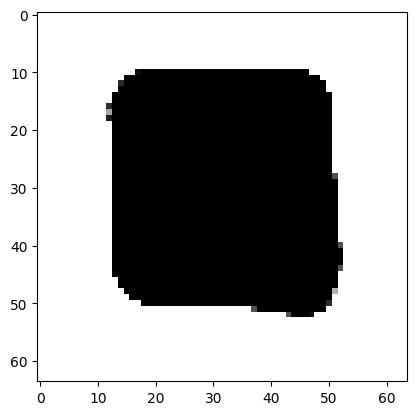

In [148]:
img = cv2.imread("ctverec.png")
img = np.full_like(img, 255) - img
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# enhance
img_pil = Image.fromarray(img_gray)
img_pil = img_pil.filter(ImageFilter.EDGE_ENHANCE_MORE)
img = np.array(img_pil)

imshow(img, cmap="gray")


/home/michael/.local/lib/python3.11/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


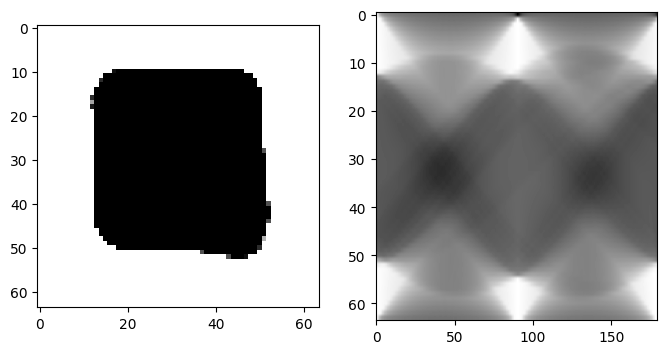

In [149]:
from skimage.transform import radon

# Perform Radon transform
theta = np.linspace(0.0, 180.0, 180, endpoint=False)
sinogram = radon(img, theta=theta, circle=True)

# Display the result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
imshow(img, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(sinogram, cmap="gray", aspect="auto")
plt.show()


In [150]:
def get_pos_angle(sinogram):
    pos, angle = np.unravel_index(np.argmin(sinogram, axis=None), sinogram.shape)
    return pos, angle


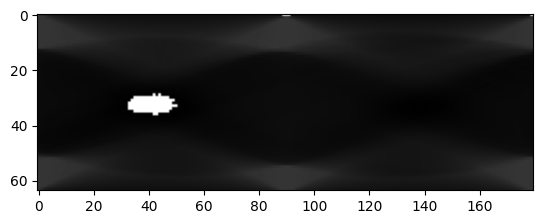

In [151]:
for _ in range(100):
    pos, angle = get_pos_angle(sinogram)
    sinogram[pos, angle] = 255

imshow(sinogram, cmap="gray")
